<a href="https://colab.research.google.com/github/Darshanbreddy/ML_FREE_CODE_CAMP/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

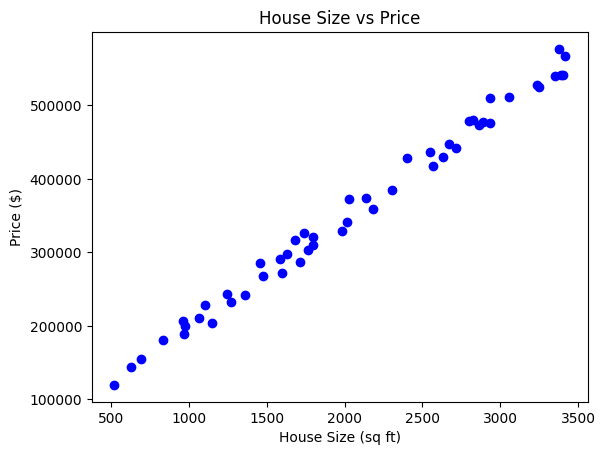

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic dataset
np.random.seed(42)
house_size = np.random.randint(500, 3500, 50)  # X (sq ft)
price = 50000 + (house_size * 150) + np.random.randint(-20000, 20000, 50)  # y

# Scatter plot
plt.scatter(house_size, price, color='blue')
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Size vs Price")
plt.show()


In [14]:
# Standardize X for easier slope learning
X = (house_size - np.mean(house_size)) / np.std(house_size)
y = price

# Initial guess
m, c = 0, 0  # slope, intercept
learning_rate = 0.01

# Function to compute Mean Squared Error (our cost function)
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Let's simulate 10 steps to see how slope changes
for step in range(10):
    y_pred = m * X + c
    error = y_pred - y

    # Gradient calculation
    dm = (2/len(X)) * np.dot(error, X)  # slope gradient
    dc = (2/len(X)) * np.sum(error)     # intercept gradient

    # Show slope sign meaning
    print(f"Step {step}: m={m:.2f}, Cost={mse(y, y_pred):.2f}, Slope Gradient={dm:.2f}")
    if dm > 0:
        print("    Positive slope → decrease m")
    else:
        print("    Negative slope → increase m")

    # Update m, c
    m -= learning_rate * dm
    c -= learning_rate * dc


Step 0: m=0.00, Cost=143154119405.28, Slope Gradient=-252233.29
    Negative slope → increase m
Step 1: m=2522.33, Cost=137490790973.89, Slope Gradient=-247188.62
    Negative slope → increase m
Step 2: m=4994.22, Cost=132051730348.37, Slope Gradient=-242244.85
    Negative slope → increase m
Step 3: m=7416.67, Cost=126828056523.63, Slope Gradient=-237399.95
    Negative slope → increase m
Step 4: m=9790.67, Cost=121811240182.35, Slope Gradient=-232651.95
    Negative slope → increase m
Step 5: m=12117.19, Cost=116993089768.19, Slope Gradient=-227998.91
    Negative slope → increase m
Step 6: m=14397.18, Cost=112365738110.42, Slope Gradient=-223438.94
    Negative slope → increase m
Step 7: m=16631.57, Cost=107921629578.30, Slope Gradient=-218970.16
    Negative slope → increase m
Step 8: m=18821.27, Cost=103653507744.06, Slope Gradient=-214590.75
    Negative slope → increase m
Step 9: m=20967.17, Cost=99554403534.45, Slope Gradient=-210298.94
    Negative slope → increase m


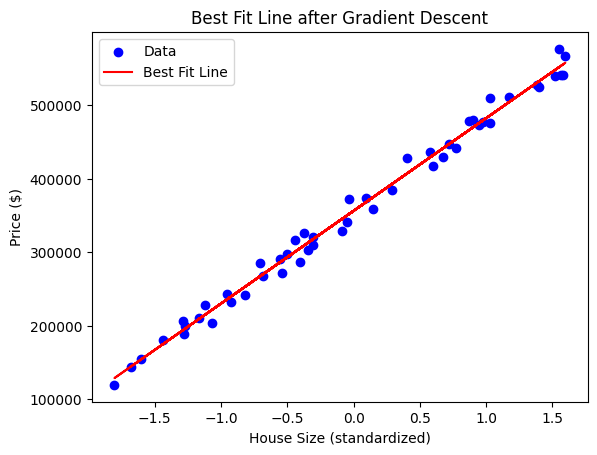

In [15]:
# Reset values
m, c = 0, 0
epochs = 1000

for _ in range(epochs):
    y_pred = m * X + c
    error = y_pred - y
    dm = (2/len(X)) * np.dot(error, X)
    dc = (2/len(X)) * np.sum(error)
    m -= learning_rate * dm
    c -= learning_rate * dc

# Plot best-fit line
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, m * X + c, color='red', label="Best Fit Line")
plt.xlabel("House Size (standardized)")
plt.ylabel("Price ($)")
plt.title("Best Fit Line after Gradient Descent")
plt.legend()
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression

# Original model: 1 feature
model1 = LinearRegression()
model1.fit(house_size.reshape(-1,1), price)
R2_1 = model1.score(house_size.reshape(-1,1), price)

# Add a correlated feature
num_rooms = (house_size / 500).astype(int)  # correlated
X2 = np.column_stack((house_size, num_rooms))
model2 = LinearRegression()
model2.fit(X2, price)
R2_2 = model2.score(X2, price)

print(f"R² with 1 feature: {R2_1:.4f}")
print(f"R² with correlated feature: {R2_2:.4f} (Increased)")


R² with 1 feature: 0.9912
R² with correlated feature: 0.9913 (Increased)


In [17]:
# Add useless feature (random)
random_feature = np.random.randint(0, 1000, size=len(house_size))
X3 = np.column_stack((house_size, num_rooms, random_feature))
model3 = LinearRegression()
model3.fit(X3, price)
R2_3 = model3.score(X3, price)

# Adjusted R² formula
def adjusted_r2(R2, n, p):
    return 1 - ( (1 - R2) * (n - 1) / (n - p - 1) )

n = len(house_size)

adj_R2_2 = adjusted_r2(R2_2, n, 2)  # with correlated feature
adj_R2_3 = adjusted_r2(R2_3, n, 3)  # with random feature

print(f"R² with useless feature: {R2_3:.4f}")
print(f"Adjusted R² before useless feature: {adj_R2_2:.4f}")
print(f"Adjusted R² after useless feature: {adj_R2_3:.4f} (Dropped)")


R² with useless feature: 0.9913
Adjusted R² before useless feature: 0.9909
Adjusted R² after useless feature: 0.9907 (Dropped)
